# CSCE 623 Homework Assignment HW1 Solution

### Student Name: LASTNAME, FIRSTNAME

### Date: X April, 2023

This homework is inspired by HOML Chapter 2 – End-to-end Machine Learning project

(https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb)

Your goal in this homework is to extend certain components of the activities performed in a DST pipeline prior to the machine learning modeling of the data.  

By accomplishing these steps, you will become more familiar with 
* aquiring and loading data
* data preprocessing 
* data exploration
* partitioning the data

As you browse this notebook, you will notice areas where student action is required.  These will be marked with "STUDENT ACTION REQUIRED" along with instructions of what you have to do.   Be sure to complete all of these steps for full credit.  Quick links to the beginning of each section are below - *these will only work after the notebook is run at least once - run all cells in the notebook once prior to starting your work*

&emsp;[Student Coding Section 1](#student_action_1)

&emsp;[Student Coding Section 2](#student_action_2)

&emsp;[Student Coding Section 3](#student_action_3)

&emsp;[Student Coding Section 4](#student_action_4)


Also note that while this notebook contains the code demoing the first part of HOML chapter 2, it doesnt always explain what the code is doing... for that, see the book.

Also note the book is terse in its descriptions of the datafields - see https://www.kaggle.com/datasets/camnugent/california-housing-prices for more clearly explained datafields





# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

Note that this code will make a subdirectory in your main directory called "end_to_end_project"

In [158]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Get the Data

## Download the Data

In [98]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [99]:
fetch_housing_data()

In [100]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

## Take a Quick Look at the Data Structure

In [101]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [102]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [103]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [104]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Saving figure attribute_histogram_plots


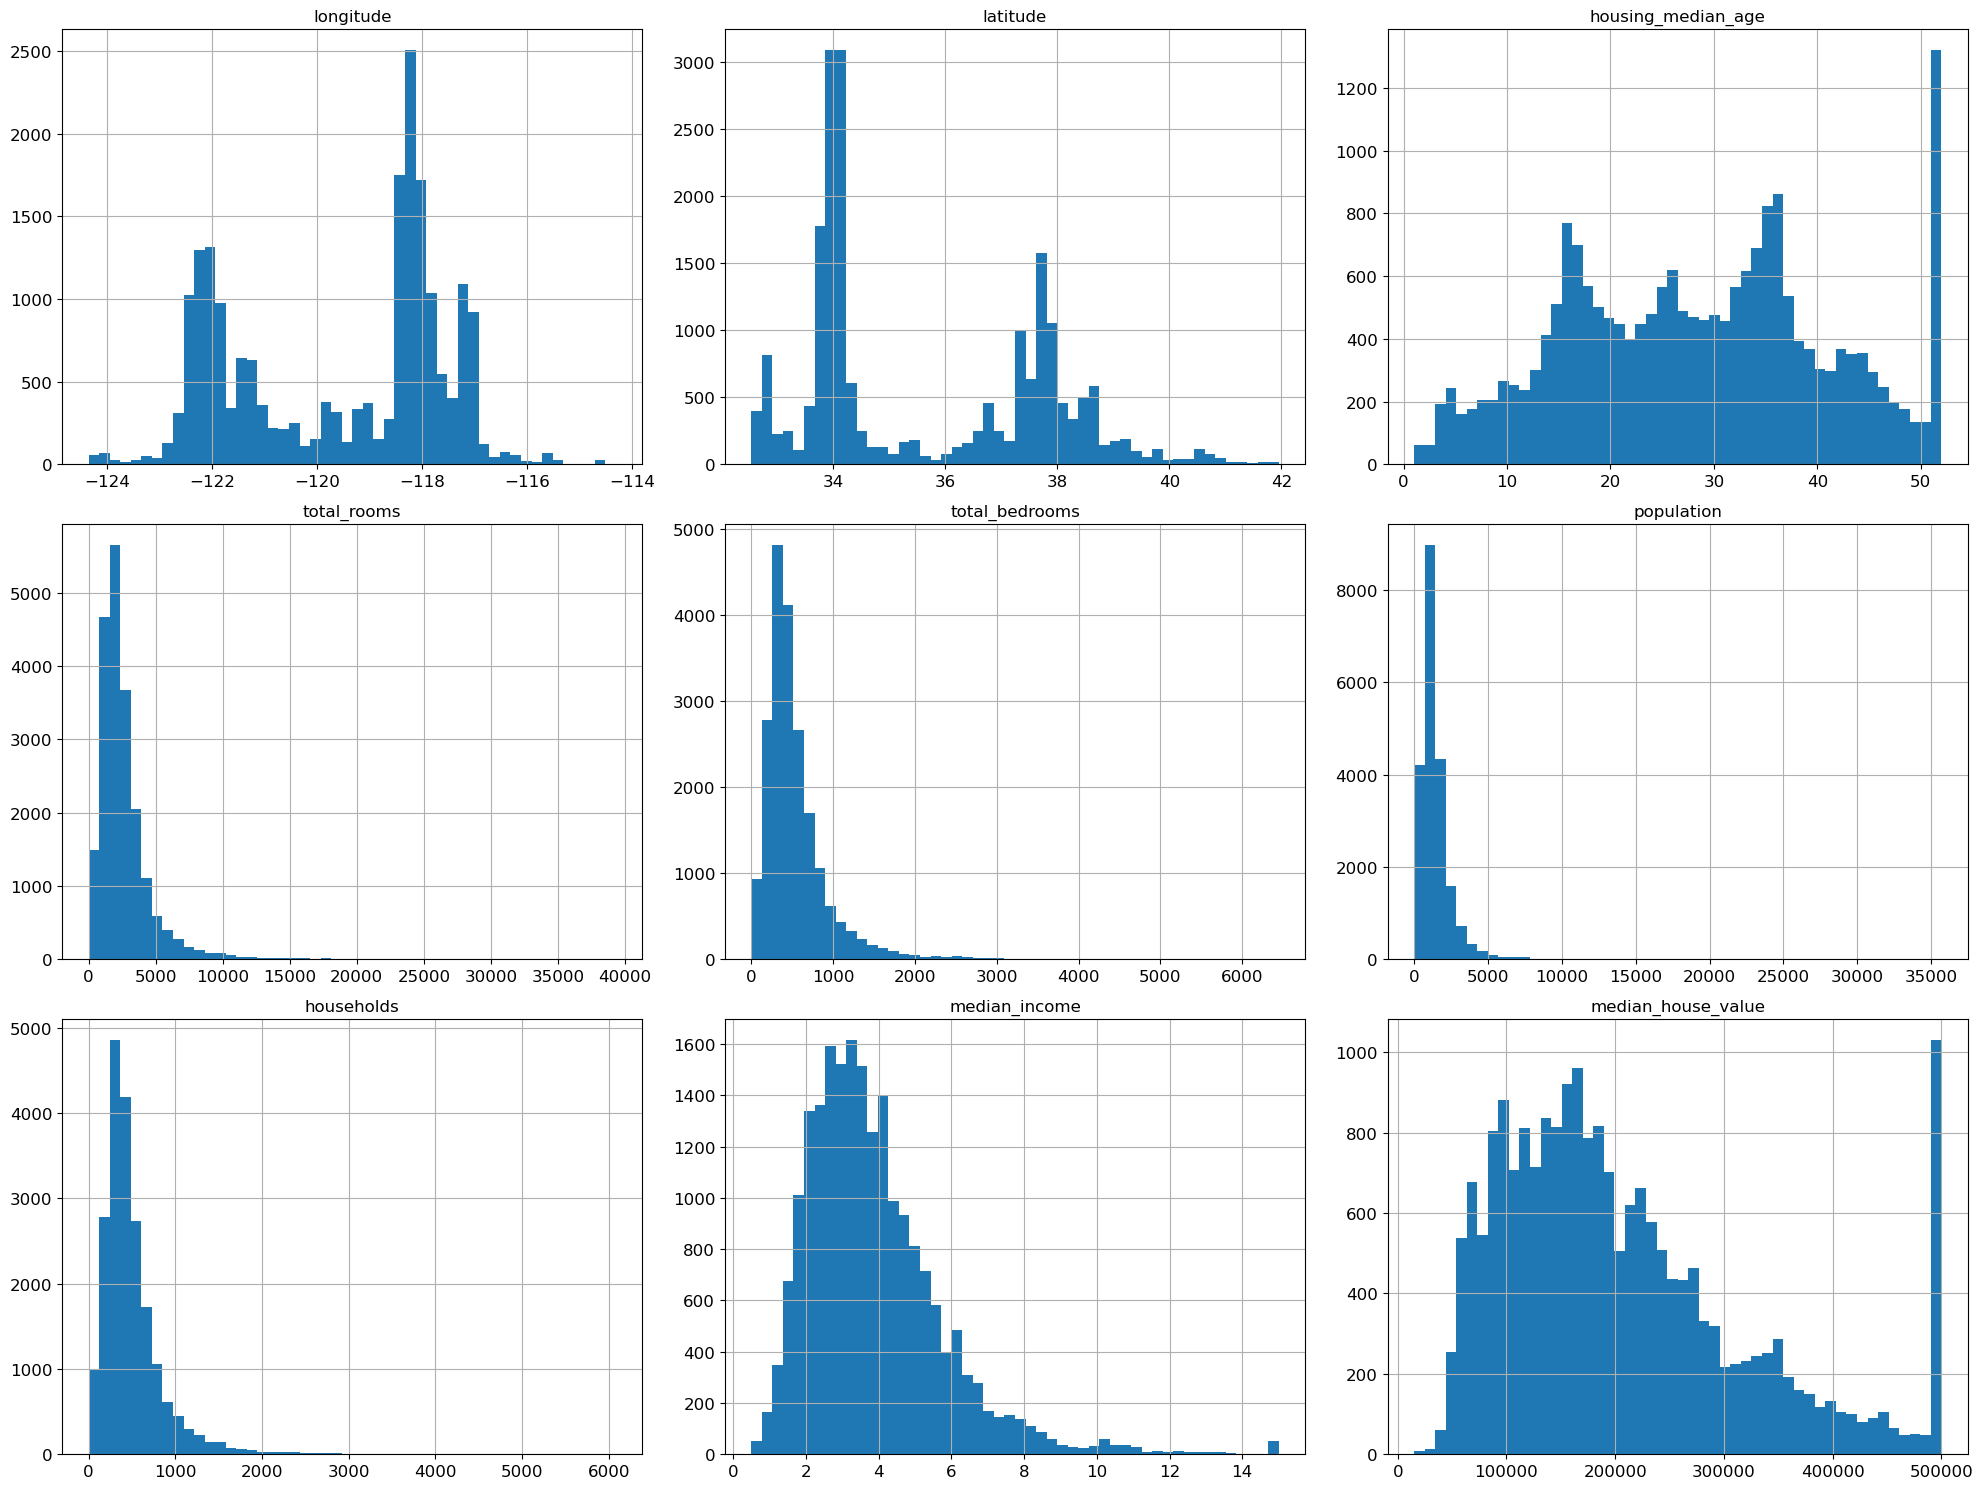

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [10]:
backup_housing=housing.copy()

<a id='student_action_1'></a>

-----
-----
# STUDENT ACTION REQUIRED SECTION 1:

Data Exploration

-----

First, lets find out some things about the data.  In later code cells you will provide solutions for the questions.

List of Housing median ages:
 [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0]

 Make a bar plot of ocean proximity (i.e. histogram for categorical data)


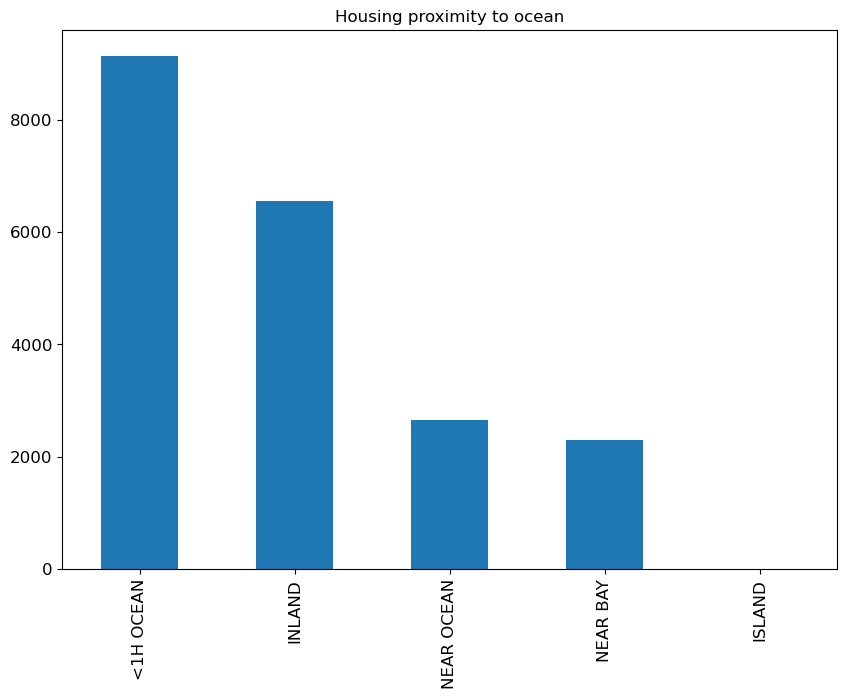

In [11]:
housing_ages = housing["housing_median_age"].value_counts().index.tolist()
housing_ages.sort()

print("List of Housing median ages:\n",housing_ages)

print("\n Make a bar plot of ocean proximity (i.e. histogram for categorical data)")
plt.figure(figsize=(10,7))
housing["ocean_proximity"].value_counts().plot(kind='bar')
plt.title("Housing proximity to ocean")
plt.show()

You are looking for a block to live on which has houses which are not too new but not too old... has fewer bedrooms, so more likely to be where young/single people live, and is near the water, but still on land which is easy-to-access by road.

### S1Q1: Demographics:  Use code to compute how many homes meet each of these individual criteria (you should provide 3 answers here):

1. Count of districts which exist in regions with `housing_median_age` between 20 and 30 years old (inclusive)
1. Count of districts which the average 'block' in the district has houses such that there are no more than 1.0 bedrooms per household (`total_bedrooms` and `households` capture this information)
1. Count of districts which are near a body of water, but *not* on an island (hint: the field `ocean_proximity` values include `NEAR OCEAN`, `NEAR BAY`, and `ISLAND` should be helpful here)

In [137]:
#S1Q1

#---------START STUDENT CODE

#Count the observations where the median age is beteween 20 and 30 inclusive.
count_median_age_good = housing[(housing["housing_median_age"] >= 20) & (housing["housing_median_age"] <= 30)].shape[0]
# print(count_median_age_good)

#Count the observations where the number of bedrooms/households is 1, e.g., only one br per household.
count_bedrooms_good = housing[(housing["total_bedrooms"]/housing["households"]) == 1].shape[0]
#print(count_bedrooms_good)

#Count the observations that are near OR near bay, but not on an island
count_near_body_of_water_good = housing[(housing["ocean_proximity"] == "NEAR OCEAN") | 
                                        (housing["ocean_proximity"] == "NEAR BAY")].shape[0]

#---------END STUDENT CODE

In [138]:
print("districts with median age good:",count_median_age_good)
print("districts with bedrooms per household good:",count_bedrooms_good)
print("districts near body of water good:",count_near_body_of_water_good)

housing.describe()

districts with median age good: 5317
districts with bedrooms per household good: 288
districts near body of water good: 4948


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### S1Q2: Complete the definition of a function which returns a new dataset with these criteria (above) met

Hint: Use logic such as `&` and `|` to select only the rows which meet all the criteria - criteria can be chained together using the logic

The instructor code which follows the function will perform the next steps:
1. Use the function to obtain the new dataset
1. Report the number of districts which meet the criteria



In [150]:
#S1Q2


def get_good_districts(df):
    new_df=None
    
    #---------START STUDENT CODE
    
    #first filter by age as the first critera 
    new_df = housing[(housing["housing_median_age"] >= 20) & (housing["housing_median_age"] <= 30)]
    
    #next narrow by bedroom/households 
    new_df = new_df[(new_df["total_bedrooms"]/new_df["households"]) == 1]
    
    #finally, narrow by closeness to water.
    new_df = new_df[(new_df["ocean_proximity"] == "NEAR OCEAN") | (new_df["ocean_proximity"] == "NEAR BAY")]  
    
    #display the ones that meet all three criteria!
    display(new_df)
    
    #---------END STUDENT CODE
    
    return new_df


In [151]:
check_df = get_good_districts(housing)
if (check_df is None):
    print("STUDENT NEEDS TO IMPLEMENT THIS FUNCTION")
else:
    print("There are ",len(check_df.index),"good districts")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1415,-122.09,37.94,29.0,6895.0,1022.0,2634.0,1022.0,6.1922,273200.0,NEAR BAY
1481,-122.04,37.96,28.0,1207.0,252.0,724.0,252.0,3.6964,165700.0,NEAR BAY
1521,-122.07,37.91,28.0,1731.0,295.0,810.0,295.0,5.0391,259800.0,NEAR BAY
8242,-118.18,33.78,20.0,1852.0,556.0,1712.0,556.0,1.4565,152500.0,NEAR OCEAN
8806,-118.35,33.74,25.0,8272.0,1132.0,3392.0,1132.0,10.0973,500001.0,NEAR OCEAN
9295,-122.49,38.00,26.0,48.0,8.0,19.0,8.0,7.7197,400000.0,NEAR BAY
11508,-118.11,33.75,24.0,1608.0,314.0,592.0,314.0,5.0926,390500.0,NEAR OCEAN
14590,-117.17,32.83,24.0,3541.0,530.0,1591.0,530.0,5.3538,212500.0,NEAR OCEAN
14699,-117.09,32.78,28.0,1708.0,393.0,816.0,393.0,2.9881,165300.0,NEAR OCEAN
14828,-117.10,32.66,27.0,1782.0,560.0,1785.0,560.0,2.1542,106300.0,NEAR OCEAN


There are  21 good districts


### S1Q3: Create a function to return a new dataframe containing only the desired fraction of the rows with the highest values of the desired column (i.e. the fraction of observations which contain the highest value in that column)

For example, if the original data contained 100 rows and 0.05 is requested for column `'population'`, then a new dataframe with 5 rows will be returned; those 5 rows are the rows which contain the highest value of the `'population'` column in the dataframe 

If the number of rows to be returned is a fraction, use the next highest integer number of rows (i.e. the ceiling)

Hint - functions to select a subset of rows in pandas require integers.  One way to convert a floating point number to a integer is to use `myfloat.astype('int')`

Note that we want this function to return a copy so that when we perform operations on the copy later, it doesnt affect the original.

In [171]:
#S1Q3
import math

def get_top_n(source_df,fraction = 0.05,columnkey='population'):  #using 0.05 as a placeholder... this number can be passed in as a parameter
    new_df = None  #placeholder for return value
    fraction = (fraction>=0.)*(fraction<=1.)*(fraction)   #forces fraction to be in the range 0 to 1, otherwise sets fraction to zero

    #---------START STUDENT CODE
   
    new_df = source_df.nlargest(math.ceil(fraction*len(source_df)), [columnkey])
    
    #---------END STUDENT CODE
    
    return new_df

# students can add testing scrap code here if desired.
def test_get_top_n(df, frac, colkey):
    #code to test the function - be careful not to alter globals
    display(get_top_n(df, frac, colkey))
    
    return None # nothing created here should be returned

#test_get_top_n(housing, .01, "population")
#test_get_top_n(housing, .10, "median_house_value")


Instructor testing block for S1Q3

housing dataframe unaltered: True
no duplicates
(20640, 10)
2064.0

rowcount in original data = 20640 ; rowcount in top population df = 2064
expected row count =  2064 ; count correct? True
bottom should contain 18576 rows
bottom rowcount 18576
common row count 0


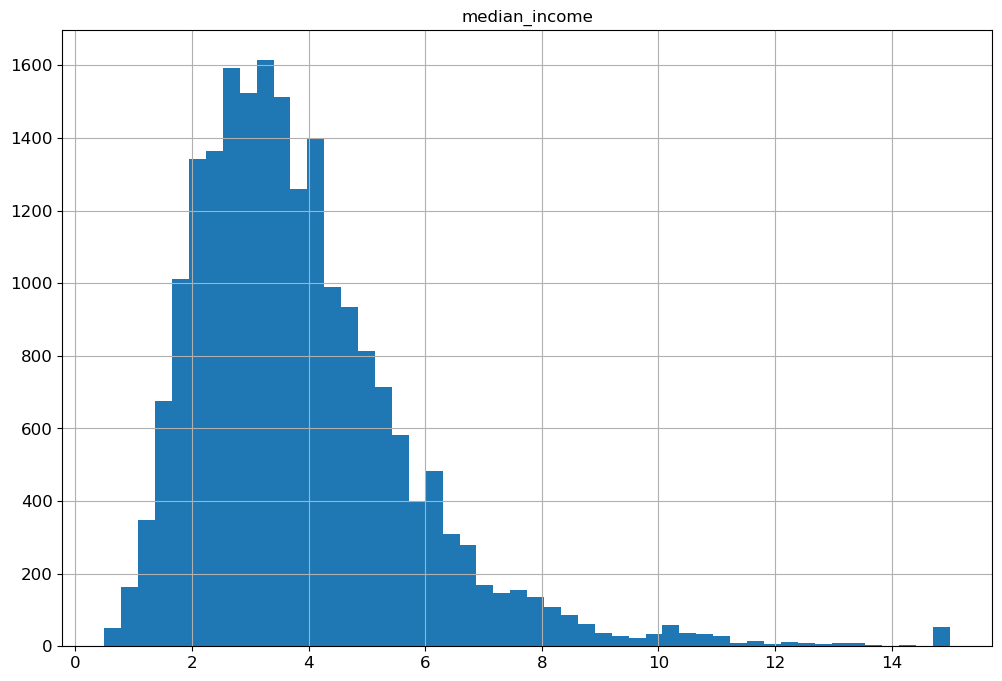

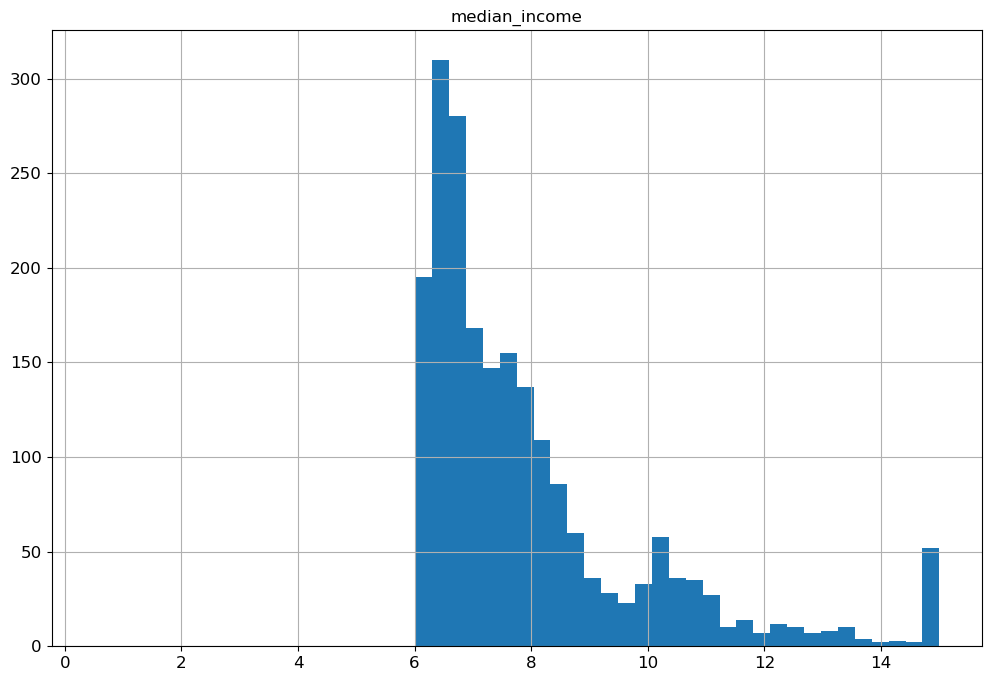

In [173]:

#INSTRUCTOR CODE HERE
fraction = 0.10
columnkey='median_income'

top_n_df = get_top_n(housing, fraction=fraction,columnkey=columnkey)

if (top_n_df is None):
    print("STUDENT CODE IS NOT YET IMPLEMENTED")
else:
    #CHECK TO MAKE SURE HOUSING DF WASNT ALTERED
    print("housing dataframe unaltered:", housing.equals(backup_housing))
    #note:  if the housing dataframe is altered then you need to fix your code above


    dup_housing = housing.duplicated()
    if dup_housing.any(): 
        print("duplicates", (dup_housing==True).shape)
        print(housing[dup_housing])
    else:
        print("no duplicates")

    print(housing.shape)
    print(housing.shape[0]*fraction)
    expected_row_count = np.ceil(housing.shape[0]*fraction).astype('int')

    print()


    print("rowcount in original data =",housing.shape[0]  ,"; rowcount in top population df =", top_n_df.shape[0])
    print("expected row count = ",expected_row_count,"; count correct?",top_n_df.shape[0]==expected_row_count )

    #check to see if only the highest rows are included   FIXME!!!!
    bottom_n_df = housing.nsmallest(housing.shape[0]-expected_row_count,columnkey)
    print("bottom should contain", housing.shape[0]-expected_row_count, "rows")
    print("bottom rowcount", bottom_n_df.shape[0])

    resData = bottom_n_df.merge(top_n_df, how = 'inner' ,indicator=False)
    print("common row count", resData.shape[0])
    if resData.shape[0]>0: 
        print(resData)
        found_common_bottom = resData.isin(bottom_n_df)
        found_common_top = resData.isin(top_n_df)
        print(found_common_top.any())
        print(found_common_bottom.any())
        print("\nbottom")
        print(bottom_n_df.loc[(bottom_n_df[columnkey]==2566.0) ])
        print("\ntop")
        print(top_n_df.loc[(top_n_df[columnkey]==2566.0) ])
        print("\nhousing")
        print(housing.loc[(housing[columnkey]==2566.0) ])



    #count, division=housing.hist('population',bins=50, figsize=(20,15))
    count, division=np.histogram(housing[columnkey],bins=50)

    housing.hist(columnkey,bins=division, figsize=(12,8))

    top_n_df.hist(columnkey,bins=division, figsize=(12,8))



#  END OF STUDENT ACTION REQUIRED SECTION 1

JUMP TO OTHER STUDENT SECTIONS:

&emsp;[Student Coding Section 1](#student_action_1)

&emsp;[Student Coding Section 2](#student_action_2)

&emsp;[Student Coding Section 3](#student_action_3)

&emsp;[Student Coding Section 4](#student_action_4)



-------
---------

## Create a Test Set

In [18]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [19]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [20]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [21]:
len(test_set)

4128

In [22]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

The implementation of `test_set_check()` above works fine in both Python 2 and Python 3. In earlier releases, the following implementation was proposed, which supported any hash function, but was much slower and did not support Python 2:

In [23]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

If you want an implementation that supports any hash function and is compatible with both Python 2 and Python 3, here is one:

In [24]:
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [25]:
housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [26]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [27]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
8,8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-122222.16
10,10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY,-122222.15
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY,-122222.15
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY,-122222.15
13,13,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY,-122222.16


In [28]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [29]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


<Axes: >

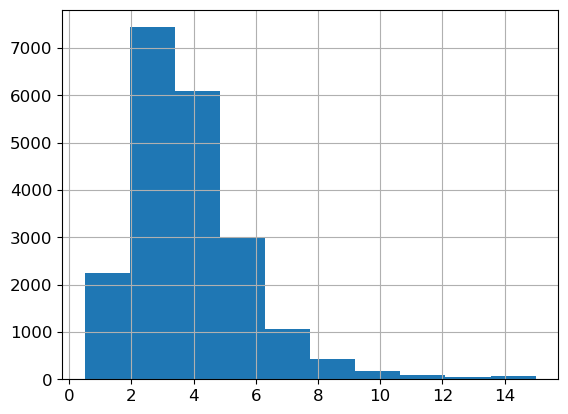

In [30]:
housing["median_income"].hist()

In [31]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [32]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<Axes: >

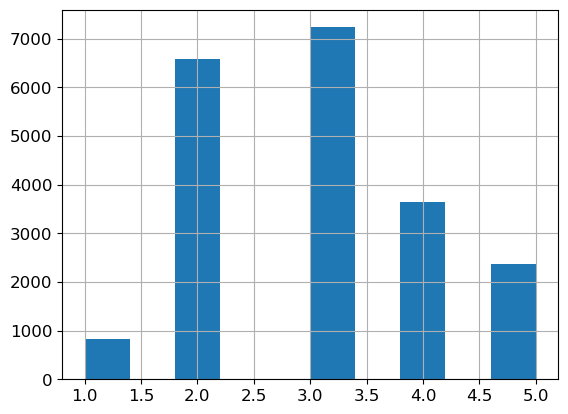

In [33]:
housing["income_cat"].hist()

In [34]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [35]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [36]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [37]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [38]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [39]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Discover and Visualize the Data to Gain Insights

In [40]:
housing = strat_train_set.copy()

## Visualizing Geographical Data

Saving figure bad_visualization_plot


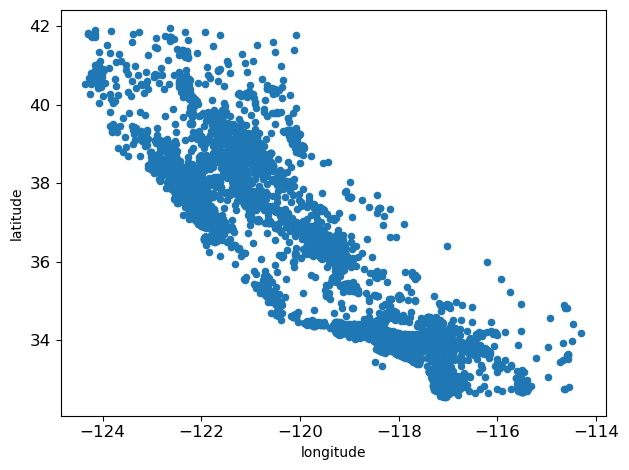

In [41]:
housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

Saving figure better_visualization_plot


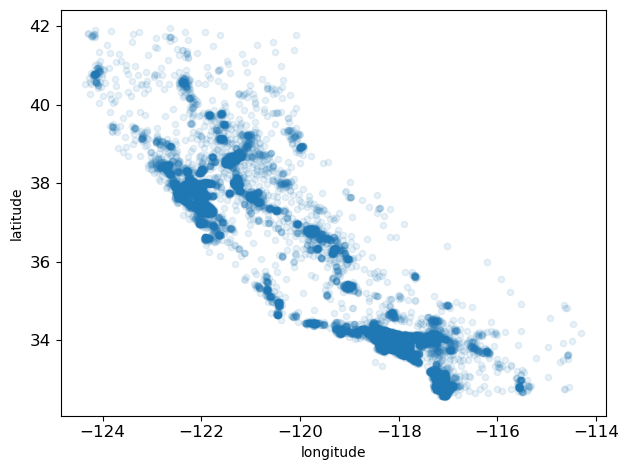

In [42]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

The argument `sharex=False` fixes a display bug (the x-axis values and legend were not displayed). This is a temporary fix (see: https://github.com/pandas-dev/pandas/issues/10611 ). Thanks to Wilmer Arellano for pointing it out.

Saving figure housing_prices_scatterplot


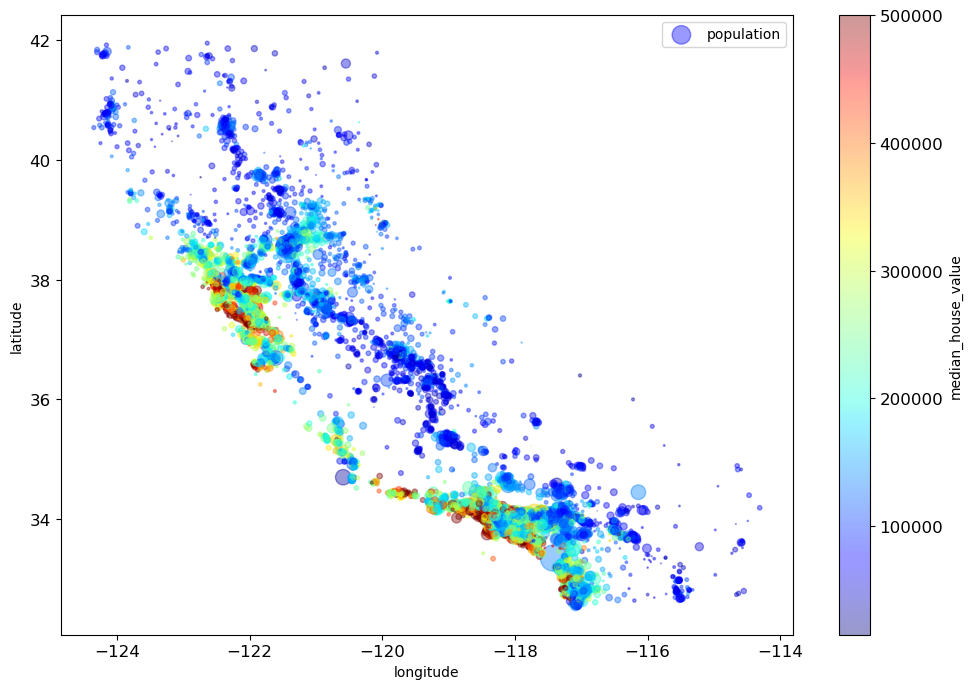

In [43]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

In [44]:
# Download the California image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\end_to_end_project\\california.png',
 <http.client.HTTPMessage at 0x2dfa6d297e0>)

Saving figure california_housing_prices_plot


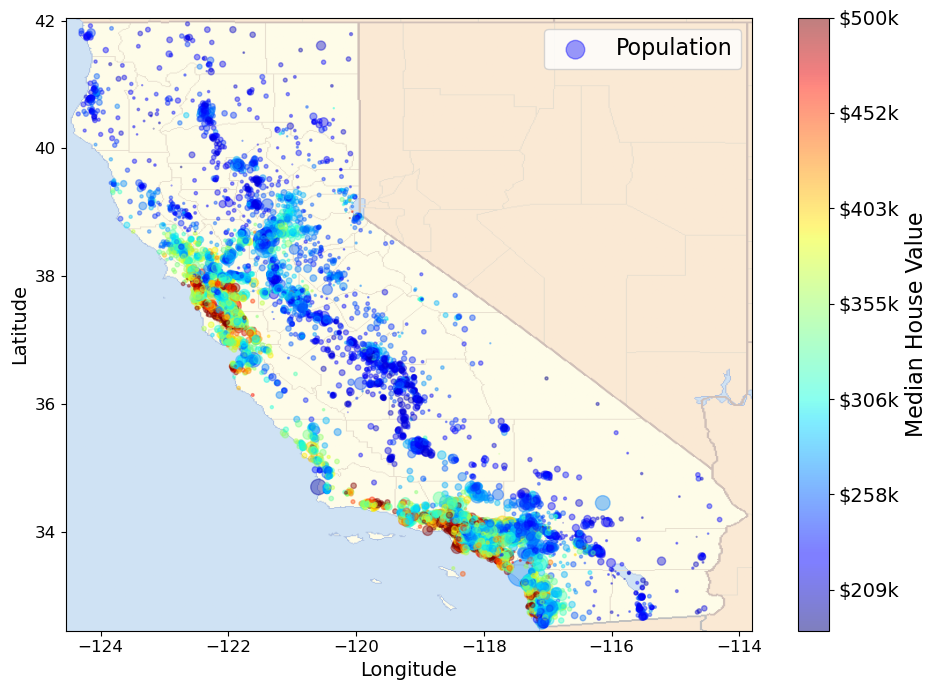

In [45]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

<a id='student_action_2'></a>

-----
-----
# STUDENT ACTION REQUIRED SECTION 2:

Data Visualization with different variables.

In the previous section, we saw maps of California with population bubbles which were colored by the `median_house_value` for the district.  

In this student code section we will create a map which displays a new derived attribute `rooms_per_household`, but only in the locations of districts of highest `median_income` 

-----

### S2Q1 Make a plot with only the top 5% of the highest-`median_income`-valued rows displayed in the plot to visualize where the wealthiest locations in the state are

* use the function you created earlier to obtain a new dataframe containing only the desired fraction (0.05) of the highest `median_income` rows from `housing`
* create a derived feature in the dataframe `rooms_per_household` (use `total_rooms` per `household` and a math function to create the new feature) 



In [175]:
#S2Q1 code here:

wealthy_df=pd.DataFrame() #placeholder
wealthy_df['rooms_per_household']=0.  #placeholder


#---------START STUDENT CODE

#obtain only the desired fraction of most wealthy income districts

wealthy_df = get_top_n(housing, 0.05, "median_income")

wealthy_df['rooms_per_household'] = wealthy_df['total_rooms']/wealthy_df['households']

#add a new column to compute total_rooms/household in the district

#---------END STUDENT CODE

Lets scatterplot just this wealthy district data - `rooms_per_household` (color of bubble) and median income (size of bubble) 

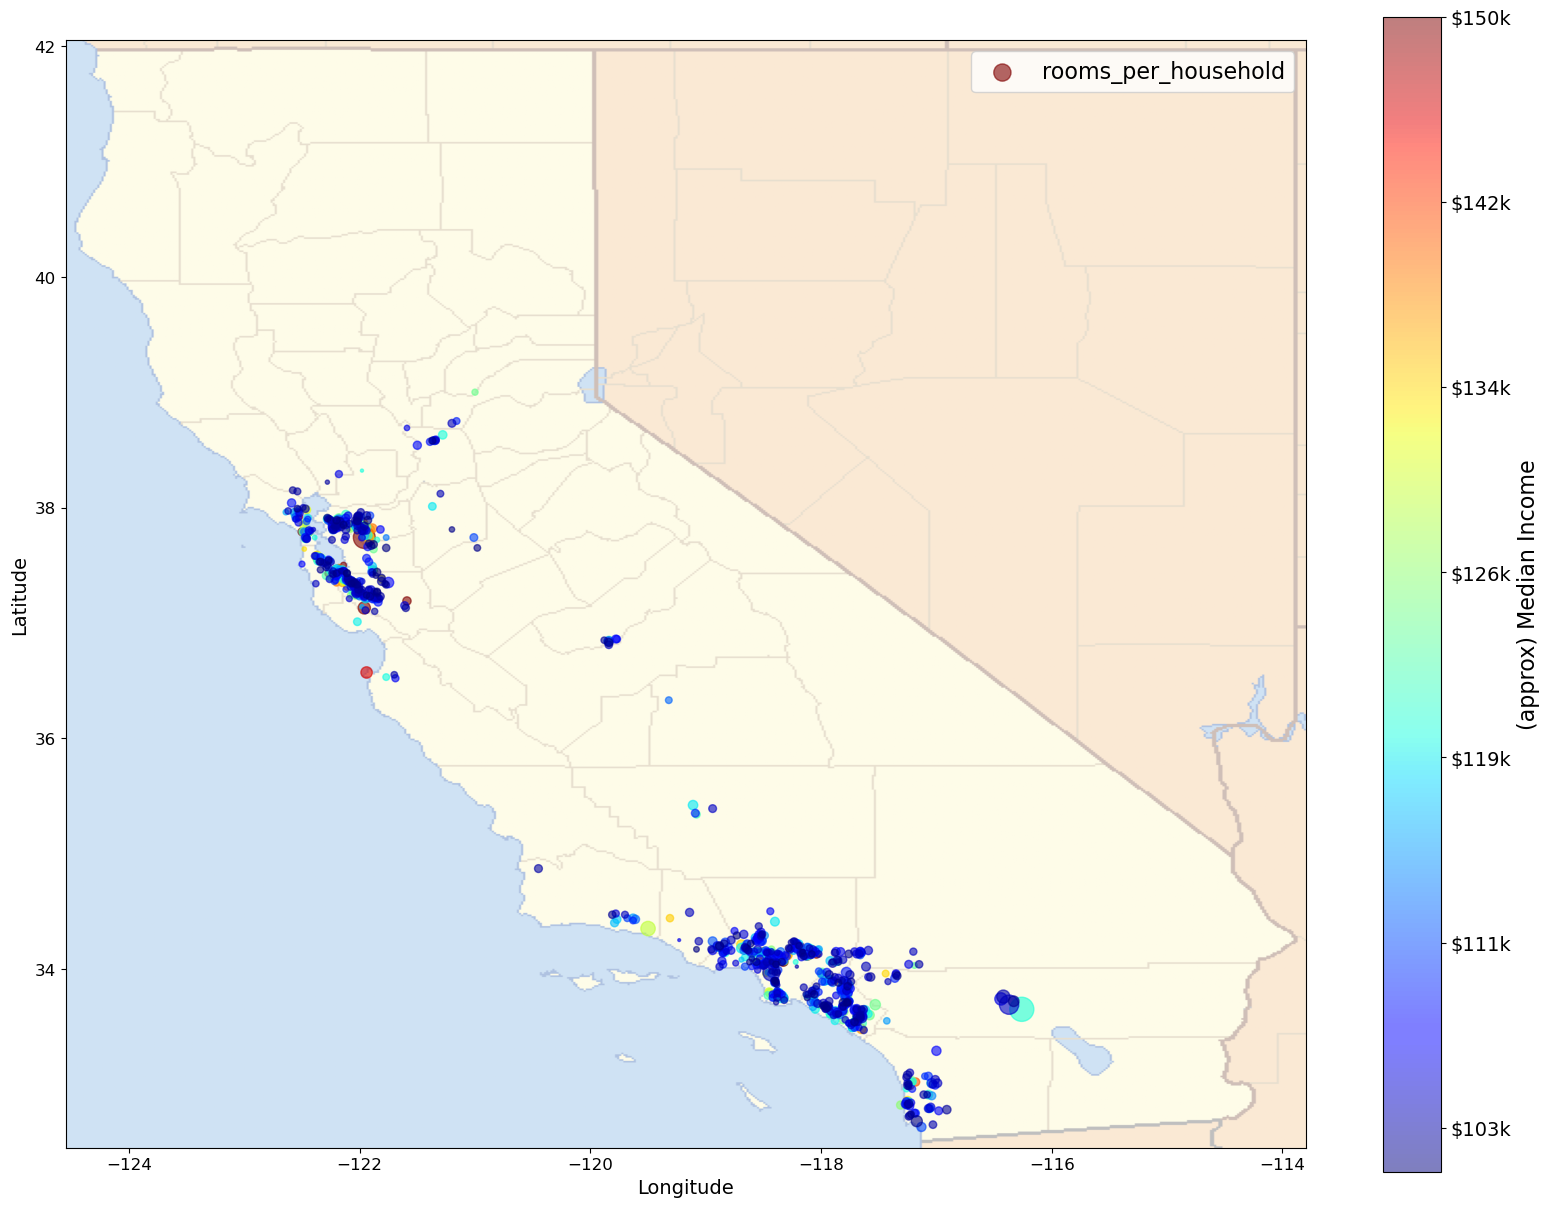

In [174]:
if not(wealthy_df['rooms_per_household']!=0).any():
    print("S2Q1 NOT YET IMPLEMENTED BY STUDENT")
else:
    california_img=mpimg.imread(os.path.join(images_path, filename))
    ax = wealthy_df.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                      s=np.power(wealthy_df['rooms_per_household'],2)/2, label="rooms_per_household",
                      c="median_income", cmap=plt.get_cmap("jet"),
                      colorbar=False, alpha=0.6)


    plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
               cmap=plt.get_cmap("jet"))


    plt.ylabel("Latitude", fontsize=14)
    plt.xlabel("Longitude", fontsize=14)

    values = wealthy_df['median_income']

    tick_values = np.linspace(values.min(), values.max(), 11)
    cbar = plt.colorbar(ticks=(tick_values-values.min())/(values.max()-values.min()))

    cbar.ax.set_yticklabels(["$%dk"%(v*10) for v in tick_values], fontsize=14)
    cbar.set_label('(approx) Median Income', fontsize=16)

    plt.legend(fontsize=16)
    fig =plt.gcf()
    fig.set_size_inches(20,15)

    plt.show()

#  END OF STUDENT ACTION REQUIRED SECTION 2


JUMP TO OTHER STUDENT SECTIONS:

&emsp;[Student Coding Section 1](#student_action_1)

&emsp;[Student Coding Section 2](#student_action_2)

&emsp;[Student Coding Section 3](#student_action_3)

&emsp;[Student Coding Section 4](#student_action_4)



-------
---------

## Looking for Correlations

In [48]:
corr_matrix = housing.corr()

C:\Users\stron\AppData\Local\Temp\ipykernel_18996\2466220658.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


In [49]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

Saving figure scatter_matrix_plot


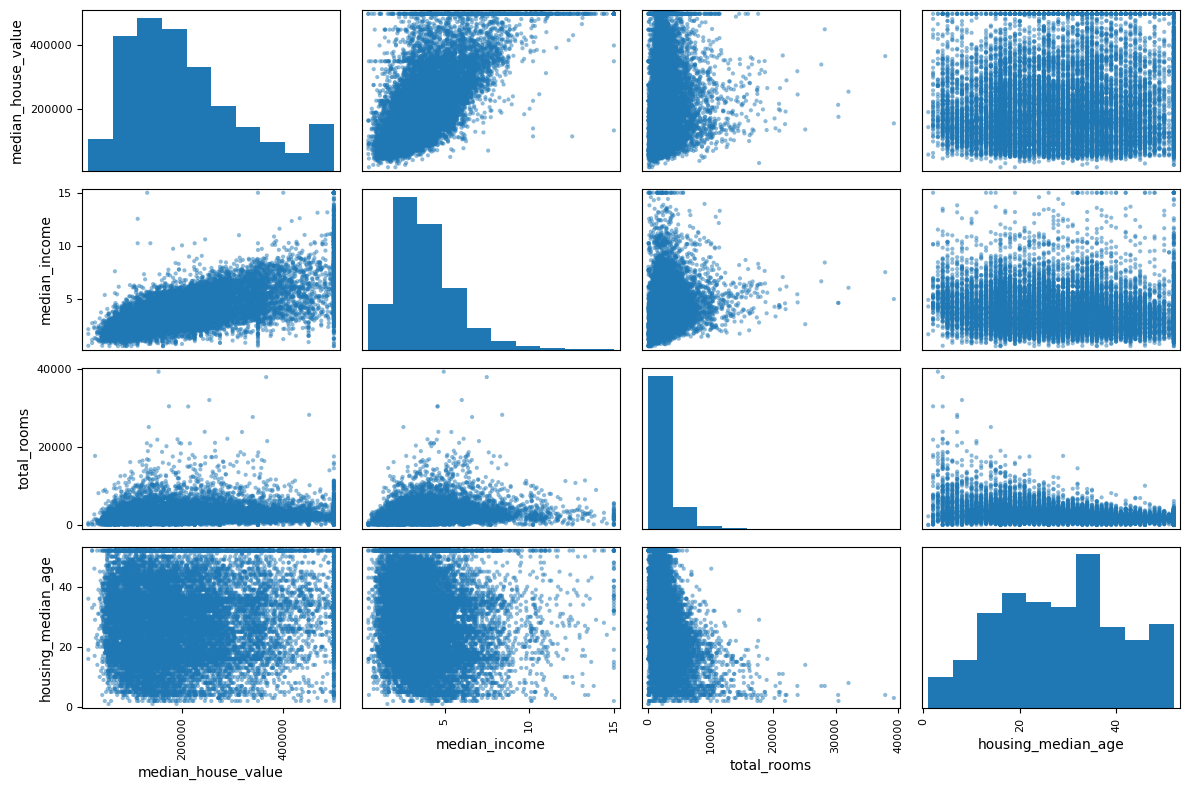

In [50]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Saving figure income_vs_house_value_scatterplot


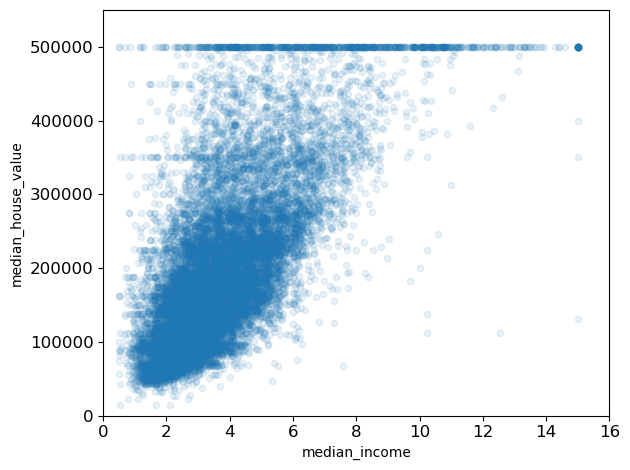

In [51]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")

## Experimenting with Attribute Combinations

In [52]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [53]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

C:\Users\stron\AppData\Local\Temp\ipykernel_18996\826279322.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

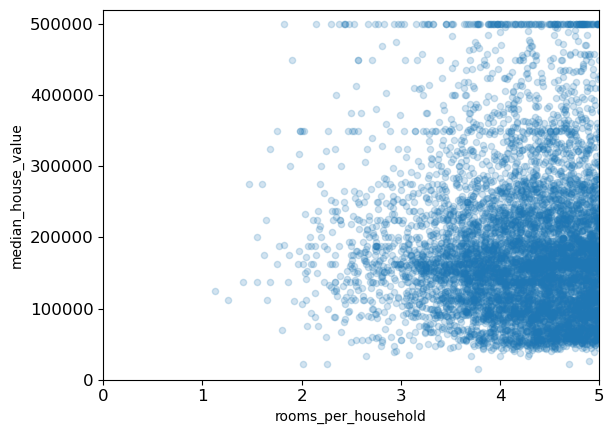

In [54]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [55]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372,5.440406,0.212873,3.096469
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250,2.611696,0.057378,11.584825
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000,4.442168,0.175304,2.431352
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000,5.232342,0.203027,2.817661
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000,6.056361,0.239816,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


<a id='student_action_3'></a>

-----
-----
# STUDENT ACTION REQUIRED SECTION 3:

Data relationships for categorical variables

The previous code analyzed corelations between numerica and `median_house_value`.  Next, we will analyze relationships within individual categories of the categorical data to determine if there are categories for which the relationships among other variables are stronger or weaker

The goal is to determine if there are meaningful differences between correlations of `median_house_value` and other numeric features under the various options for `ocean_proximity`

-----

### S3Q1: calculate and print correlation matrices under each of the following `ocean_proximity` conditions

* `INLAND` 
* `<1H OCEAN` 
* (`NEAR BAY` OR `NEAR OCEAN`)

(since there are very few island districts we will ignore those)



Steps to take in the following code cell:
* Make correlation matrix (using `.corr()`) for each of the three conditions above
* Print out the sorted correlations from `median_house_value` with other numerical attributes. (see code above for hints)
* Inspect the results and answer the questions in the markdown cells in the remainder of this section

In [56]:
#S3Q1

#placeholders...
corr_matrix_inland = None
corr_matrix_less_than_hour_to_water = None
corr_matrix_near_water = None

#---------START STUDENT CODE

#---------END STUDENT CODE


### S3Q2:  Given the output from the previous question, under which of the three `ocean_proximity` conditions does `population_per_household` provide the most information about predicting `median_house_value`?  

(Note that strong correlations suggest strong predictive performance, and that the magnitude (absolute value) of the correlation value indicates its strength.)

    ---------STUDENT ANSWER REQUIRED--------

    ENTER YOUR ANSWER FOR S3Q2 BELOW 

    (your answer here)


    ------------END of ANSWER -------------

### S3Q3:  Not including `median_house_value` or `median_income`, what is the next best single predictor of `median_house_value` under each of the three ocean_proximity conditions, and, given what you observe, what could you conclude about different features affects on home values, based on proximity to the ocean?

    ---------STUDENT ANSWER REQUIRED--------

    ENTER YOUR ANSWER FOR S3Q3 BELOW 

    (your answer here)
    

    ------------END of ANSWER -------------

#  END OF STUDENT ACTION REQUIRED SECTION 3


JUMP TO OTHER STUDENT SECTIONS:

&emsp;[Student Coding Section 1](#student_action_1)

&emsp;[Student Coding Section 2](#student_action_2)

&emsp;[Student Coding Section 3](#student_action_3)

&emsp;[Student Coding Section 4](#student_action_4)



-------
---------

# Prepare the Data for Machine Learning Algorithms

In [57]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

## Data Cleaning

In the book 3 options are listed:

```python
housing.dropna(subset=["total_bedrooms"])    # option 1
housing.drop("total_bedrooms", axis=1)       # option 2
median = housing["total_bedrooms"].median()  # option 3
housing["total_bedrooms"].fillna(median, inplace=True)
```

To demonstrate each of them, let's create a copy of the housing dataset, but keeping only the rows that contain at least one null. Then it will be easier to visualize exactly what each option does:

In [58]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


In [59]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [60]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,NEAR OCEAN


In [61]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3

In [62]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN


In [63]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

Remove the text attribute because median can only be calculated on numerical attributes:

In [64]:
housing_num = housing.drop("ocean_proximity", axis=1)
# alternatively: housing_num = housing.select_dtypes(include=[np.number])

In [65]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [66]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

Check that this is the same as manually computing the median of each attribute:

In [67]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

Transform the training set:

In [68]:
X = imputer.transform(housing_num)

In [69]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

In [70]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580


In [71]:
imputer.strategy

'median'

In [72]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [73]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


## Handling Text and Categorical Attributes

Now let's preprocess the categorical input feature, `ocean_proximity`:

In [74]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [75]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [76]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [77]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

By default, the `OneHotEncoder` class returns a sparse array, but we can convert it to a dense array if needed by calling the `toarray()` method:

In [78]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

Alternatively, you can set `sparse=False` when creating the `OneHotEncoder`:

In [79]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

C:\Users\stron\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [80]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Custom Transformers

Let's create a custom transformer to add extra attributes:

In [81]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

Note that I hard coded the indices (3, 4, 5, 6) for concision and clarity in the book, but it would be much cleaner to get them dynamically, like this:

In [82]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # get the column indices

Also, `housing_extra_attribs` is a NumPy array, we've lost the column names (unfortunately, that's a problem with Scikit-Learn). To recover a `DataFrame`, you could run this:

In [83]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


## Transformation Pipelines

Now let's build a pipeline for preprocessing the numerical attributes:

In [84]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [85]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [86]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [87]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [88]:
housing_prepared.shape

(16512, 16)

For reference, here is the old solution based on a `DataFrameSelector` transformer (to just select a subset of the Pandas `DataFrame` columns), and a `FeatureUnion`:

In [89]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

Now let's join all these components into a big pipeline that will preprocess both the numerical and the categorical features:

In [90]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [91]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [92]:
old_housing_prepared = old_full_pipeline.fit_transform(housing)
old_housing_prepared

C:\Users\stron\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

The result is the same as with the `ColumnTransformer`:

In [93]:
np.allclose(housing_prepared, old_housing_prepared)

True

<a id='student_action_4'></a>

-----
-----
# STUDENT ACTION REQUIRED SECTION 4:

Understanding scaling transformations

-----

The previous code provided by the book used sklearn's `StandardScaler` function to preprocess a set of numeric values.  Answer the following 3 questions in the next markdown block

### S4Q1:  Describe what this function does to each member of the set of numbers when using the default `StandardScaler` function call.
### S4Q2:  Describe the attributes of the resulting transformed set of numbers in terms of its statistics. 
### S4Q3:  Will the resulting set be a Gaussian distribution?

    ---------STUDENT ANSWER REQUIRED--------

    ENTER YOUR ANSWER TO S4Q1 BELOW 

    (your answer here)
 
    ENTER YOUR ANSWER TO S4Q2 BELOW 

    (your answer here)

    ENTER YOUR ANSWER TO S4Q3 BELOW 

    (your answer here)


    ------------END of ANSWER -------------

Suppose that instead of using the `StandardScaler`, you decided you wanted to scale your feature values such that all transformed values resided on the interval [0,1]

S4Q4:  What sklearn function would you use to do this?


    ---------STUDENT ANSWER REQUIRED--------

    ENTER YOUR ANSWER TO S4Q4 BELOW 

    (your answer here)

    ------------END of ANSWER -------------

#  END OF STUDENT ACTION REQUIRED SECTION 4


JUMP TO OTHER STUDENT SECTIONS:

&emsp;[Student Coding Section 1](#student_action_1)

&emsp;[Student Coding Section 2](#student_action_2)

&emsp;[Student Coding Section 3](#student_action_3)

&emsp;[Student Coding Section 4](#student_action_4)



-------
---------